In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [17]:
INF = 1e9

1000000000.0

In [3]:
import os
cwd = os.getcwd()

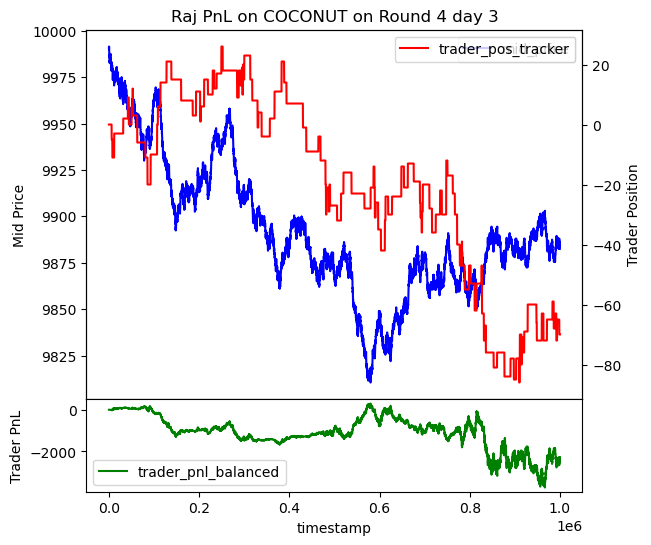

In [117]:
item = "COCONUT"
name = "Raj"
roundNo = 4
dayNo = 3

r4d1 = pd.read_csv(cwd+f"/round5data/trades_round_{roundNo}_day_{dayNo}_wn.csv",sep=";")
r4d1p =  pd.read_csv(cwd+f"/round5data/prices_round_{roundNo}_day_{dayNo}.csv",sep=";")
r4d1Coco = r4d1[(r4d1["symbol"] == item)]
r4d1pCoco = r4d1p[(r4d1p["product"] == item)]
raj_coco = r4d1Coco[(r4d1Coco["buyer"] == name) |(r4d1Coco["seller"] == name)]

df = r4d1pCoco.merge(raj_coco,how="left",on="timestamp")
df["quantity"] = df["quantity"].fillna(value=0)
df.loc[df["seller"] == name,"quantity"] = -df.loc[df["seller"] == name,"quantity"]
df["trader_pos_tracker"] = df["quantity"].cumsum()
df["price"] = df["price"].fillna(value=0)
df["trader_pnl_perRound"] = - df["price"] * df["quantity"]
df["trader_pnl_agg"] = df["trader_pnl_perRound"].cumsum()
df["trader_pnl_balanced"] = df["trader_pnl_agg"] + df["trader_pos_tracker"] * df["mid_price"]


fig, ax1 = plt.subplots()

df.plot(x='timestamp', y='mid_price', ax=ax1, color='b')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Mid Price')

ax2 = ax1.twinx()
df.plot(x='timestamp', y='trader_pos_tracker', ax=ax2, color='r')
ax2.set_ylabel('Trader Position')

ax3 = plt.gca().inset_axes([0, -0.25, 1, 0.25])
df.plot(x='timestamp', y='trader_pnl_balanced', ax=ax3, color='g')
ax3.set_ylabel('Trader PnL')

plt.title(f'{name} PnL on {item} on Round {roundNo} day {dayNo}')
plt.savefig(f'traderPNL/{name} PnL on {item} on Round {roundNo} day {dayNo}')
plt.show()

In [57]:
df.loc[df["buyer"].notnull(),["buyer","seller","price","quantity","trader_pos_tracker","trader_pnl_perRound","trader_pnl_agg","trader_pnl_balanced"]]

,buyer,seller,price,quantity,trader_pos_tracker,trader_pnl_perRound,trader_pnl_agg,trader_pnl_balanced
93,Raj,Vinnie,10005.0,6.0,6.0,-60030.0,-60030.0,-6.0
125,Vinnie,Raj,10003.0,10.0,16.0,-100030.0,-160060.0,4.0
201,Vinnie,Raj,9990.0,10.0,26.0,-99900.0,-259960.0,-207.0
208,Vinnie,Raj,9993.0,10.0,36.0,-99930.0,-359890.0,-124.0
431,Raj,Vinnie,9974.0,8.0,44.0,-79792.0,-439682.0,-870.0
...,...,...,...,...,...,...,...,...
9786,Vinnie,Raj,10129.0,10.0,1174.0,-101290.0,-11790972.0,101061.0
9796,Vinnie,Raj,10132.0,5.0,1179.0,-50660.0,-11841632.0,105175.0
9799,Vinnie,Raj,10134.0,10.0,1189.0,-101340.0,-11942972.0,106948.5
9867,Raj,Vinnie,10126.0,9.0,1198.0,-91134.0,-12034106.0,96243.0


/var/folders/v9/h8hyk8_126b0h83wwqrt1q1w0000gn/T/ipykernel_6782/915369755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["seller"] == name]["quantity"] = -(df[df["seller"] == name]["quantity"])


In [48]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,buyer,seller,symbol,currency,price,quantity,trader_pos_tracker,trader_pnl_perRound,trader_pnl_agg,trader_pnl_balanced
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.0,-0.0,0.0
1,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.0,-0.0,0.0
2,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.0,-0.0,0.0
3,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.0,-0.0,0.0
4,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1,999500,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,...,Vinnie,Vinnie,COCONUT,SEASHELLS,10135.0,8.0,4318.0,-81080.0,-43349386.0,415703.0
10012,1,999600,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,...,NaN,NaN,NaN,NaN,0.0,0.0,4318.0,-0.0,-43349386.0,420021.0
10013,1,999700,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,...,NaN,NaN,NaN,NaN,0.0,0.0,4318.0,-0.0,-43349386.0,411385.0
10014,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,...,NaN,NaN,NaN,NaN,0.0,0.0,4318.0,-0.0,-43349386.0,413544.0


In [28]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_3,ask_volume_3,mid_price,profit_and_loss,buyer,seller,symbol,currency,price,quantity
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,...,NaN,NaN,10000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,...,NaN,NaN,9999.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,...,NaN,NaN,9998.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,...,NaN,NaN,9999.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,...,NaN,NaN,9998.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1,999500,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,...,NaN,NaN,10135.5,0.0,Vinnie,Vinnie,COCONUT,SEASHELLS,10135.0,NaN
10012,1,999600,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,...,NaN,NaN,10136.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10013,1,999700,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,...,NaN,NaN,10134.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10014,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,...,NaN,NaN,10135.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
r4d1p["slope_sign"] = True
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

for i in range(len(r4d1p)-10):
    y = np.asarray(r4d1p.iloc[i:(i+10),14])
    clf = LinearRegression()
    clf.fit(X, y)
    slope = clf.coef_[0]
    r4d1p.iloc[i,16] = (slope > 0)

In [80]:
raj_coco = r4d1coco[(r4d1coco["buyer"] == "Raj") |(r4d1coco["seller"] == "Raj") ]

In [87]:
r4d1p

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,slope_sign
timestamp,,,,,,,,,,,,,,,,,
0,1,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0,False
100,1,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0,False
200,1,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0,False
300,1,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0,False
400,1,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,1,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,111,10137.0,51.0,NaN,NaN,10135.5,0.0,True
999600,1,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,130,10138.0,67.0,NaN,NaN,10136.5,0.0,True
999700,1,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,108,10136.0,54.0,NaN,NaN,10134.5,0.0,True


In [82]:
raj_coco["midpirce"] = r4d1p.loc[raj_coco.index, "mid_price"]
raj_coco["slope_sign"] = r4d1p.loc[raj_coco.index, "slope_sign"]

/var/folders/v9/h8hyk8_126b0h83wwqrt1q1w0000gn/T/ipykernel_5405/3801968286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raj_coco["midpirce"] = r4d1p.loc[raj_coco.index, "mid_price"]
/var/folders/v9/h8hyk8_126b0h83wwqrt1q1w0000gn/T/ipykernel_5405/3801968286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raj_coco["slope_sign"] = r4d1p.loc[raj_coco.index, "slope_sign"]


In [64]:
X = np.array([[1],[2],[3],[4],[5]])
from sklearn.linear_model import LinearRegression

for i in range(len(raj_coco)-5):
    y = np.asarray(raj_coco.iloc[i:(i+5),6])
    clf = LinearRegression()
    clf.fit(X, y)
    slope = clf.coef_[0]
    raj_coco.iloc[i,7] = (slope > 0)

/var/folders/v9/h8hyk8_126b0h83wwqrt1q1w0000gn/T/ipykernel_5405/2995811454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raj_coco.iloc[i,7] = (slope > 0)


In [83]:
raj_coco["Raj_action"] = True
raj_coco.loc[raj_coco["seller"] == "Raj","Raj_action"] = False


/var/folders/v9/h8hyk8_126b0h83wwqrt1q1w0000gn/T/ipykernel_5405/1219526964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raj_coco["Raj_action"] = True


In [85]:
sum(raj_coco["slope_sign"]==raj_coco["Raj_action"]) / (len(raj_coco))

0.5064935064935064

In [86]:
raj_coco

,buyer,seller,symbol,currency,price,quantity,midpirce,slope_sign,Raj_action
timestamp,,,,,,,,,
9300,Raj,Vinnie,COCONUT,SEASHELLS,10005.0,6,10004.0,True,True
12500,Vinnie,Raj,COCONUT,SEASHELLS,10003.0,10,10004.0,True,False
20100,Vinnie,Raj,COCONUT,SEASHELLS,9990.0,10,9990.5,True,False
20800,Vinnie,Raj,COCONUT,SEASHELLS,9993.0,10,9993.5,False,False
43100,Raj,Vinnie,COCONUT,SEASHELLS,9974.0,8,9973.0,True,True
...,...,...,...,...,...,...,...,...,...
978600,Vinnie,Raj,COCONUT,SEASHELLS,10129.0,10,10129.5,True,False
979600,Vinnie,Raj,COCONUT,SEASHELLS,10132.0,5,10133.0,True,False
979900,Vinnie,Raj,COCONUT,SEASHELLS,10134.0,10,10134.5,True,False


In [18]:
d = {"basket": np.array(basket["mid_price"]), "combination":np.array(rose["mid_price"]) + 4*np.array(chocolate["mid_price"]) +6*np.array(strawberry["mid_price"])}
df = pd.DataFrame(data=d)
df['diff'] = df['basket'] - df['combination']

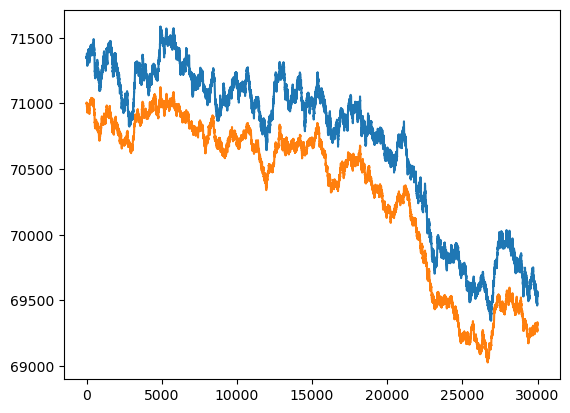

In [39]:
plt.plot(df["basket"], label='basket')
plt.plot(df["combination"],label='combination')



<function matplotlib.pyplot.show(close=None, block=None)>

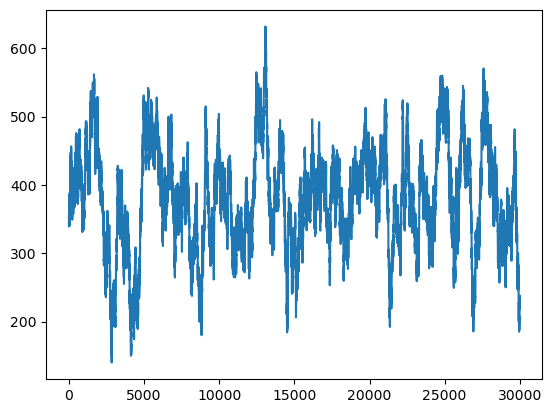

In [40]:
plt.plot(df['diff'])
plt.show

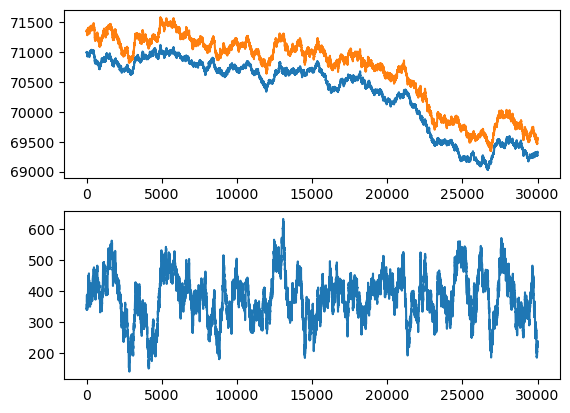

In [42]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(df["combination"],label='combination')
ax1.plot(df["basket"], label='basket')
ax2.plot(df['diff'])

/Users/shuai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

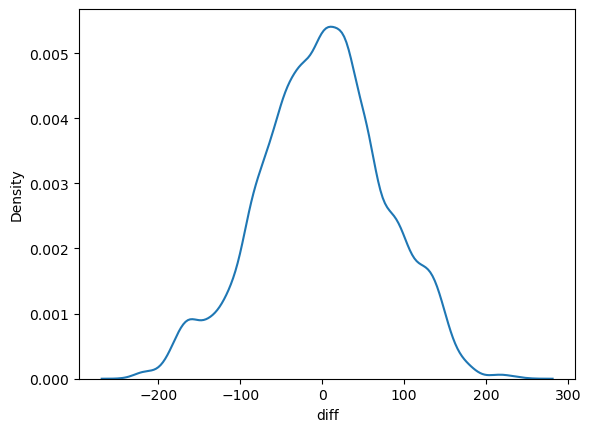

In [19]:
import seaborn as sns
import math
sns.distplot(df['diff']-380, hist=False)

In [66]:
from statsmodels.tsa.stattools import adfuller
n = 1
tmp = np.log(df["basket"]) - 1*np.log(df["combination"])
adftest = adfuller(tmp)
pvalue = adftest[1]

In [65]:
print(f"P-value={pvalue}")
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

P-value=0.7679933621430577
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [20]:
math.sqrt(np.var(df["diff"]))

76.42310842343223

In [21]:
max(df["diff"])

632.0